<a href="https://colab.research.google.com/github/daredevil3435/Internship_Project/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai
from fastai.vision.all import *

In [13]:
path = untar_data(URLs.FOOD)

In [14]:
path

Path('/root/.fastai/data/food-101')

In [15]:
len(get_image_files('/root/.fastai/data/food-101'))

101000

In [16]:
get_files(path)

(#101017) [Path('/root/.fastai/data/food-101/train.txt'),Path('/root/.fastai/data/food-101/classes.txt'),Path('/root/.fastai/data/food-101/test.json'),Path('/root/.fastai/data/food-101/test.txt'),Path('/root/.fastai/data/food-101/labels.txt'),Path('/root/.fastai/data/food-101/train.json'),Path('/root/.fastai/data/food-101/images/baby_back_ribs/1959961.jpg'),Path('/root/.fastai/data/food-101/images/baby_back_ribs/1153312.jpg'),Path('/root/.fastai/data/food-101/images/baby_back_ribs/2275499.jpg'),Path('/root/.fastai/data/food-101/images/baby_back_ribs/2535607.jpg')...]

<Axes: >

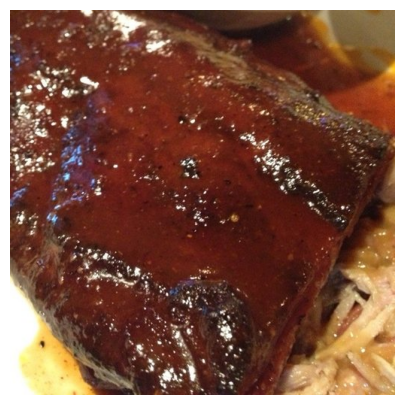

In [40]:
img = PILImage.create('/root/.fastai/data/food-101/images/baby_back_ribs/2535607.jpg')
img.show()

In [41]:
pd.read_json('/root/.fastai/data/food-101/test.json')

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,churros/904526,hot_and_sour_soup/963551,samosa/917040,sashimi/889209,pork_chop/92293,spring_rolls/949343,panna_cotta/97960,beef_tartare/926143,greek_salad/949442,foie_gras/953456,...,chicken_quesadilla/921154,pho/964800,prime_rib/940800,cheesecake/970606,ice_cream/880755,omelette/955537,grilled_cheese_sandwich/942123,lobster_roll_sandwich/91688,nachos/962352,oysters/967284
246,churros/937430,hot_and_sour_soup/968546,samosa/929017,sashimi/893381,pork_chop/929555,spring_rolls/950371,panna_cotta/980326,beef_tartare/948352,greek_salad/961722,foie_gras/961263,...,chicken_quesadilla/924555,pho/965012,prime_rib/941938,cheesecake/972877,ice_cream/891533,omelette/97045,grilled_cheese_sandwich/942187,lobster_roll_sandwich/931310,nachos/98976,oysters/967288
247,churros/938480,hot_and_sour_soup/982582,samosa/937665,sashimi/938288,pork_chop/934946,spring_rolls/951951,panna_cotta/981405,beef_tartare/956509,greek_salad/968471,foie_gras/982330,...,chicken_quesadilla/9290,pho/982022,prime_rib/956130,cheesecake/996516,ice_cream/923525,omelette/978714,grilled_cheese_sandwich/975531,lobster_roll_sandwich/946365,nachos/99050,oysters/978125
248,churros/95272,hot_and_sour_soup/984258,samosa/960937,sashimi/981801,pork_chop/942955,spring_rolls/990689,panna_cotta/98261,beef_tartare/976175,greek_salad/995103,foie_gras/98353,...,chicken_quesadilla/94597,pho/990037,prime_rib/958647,cheesecake/996918,ice_cream/995145,omelette/979117,grilled_cheese_sandwich/977481,lobster_roll_sandwich/962425,nachos/99088,oysters/978925


In [42]:
labelA = 'samosa'
labelB = 'churros'

In [43]:
#Loop through all Images downloaded
for img in get_image_files(path):
  #Rename Images so that the Label (Samosa or Churros) is in the file name
  if labelA in str(img):
    img.rename(f"{img.parent}/{labelA}-{img.name}")
  elif labelB in str(img):
    img.rename(f"{img.parent}/{labelB}-{img.name}")
  else: os.remove(img) #If the Images are not part of labelA or labelB

len(get_image_files(path))

2000

In [44]:
def GetLabel(fileName):
  return fileName.split('-')[0]

GetLabel("churros-734186.jpg") #Testing

'churros'

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


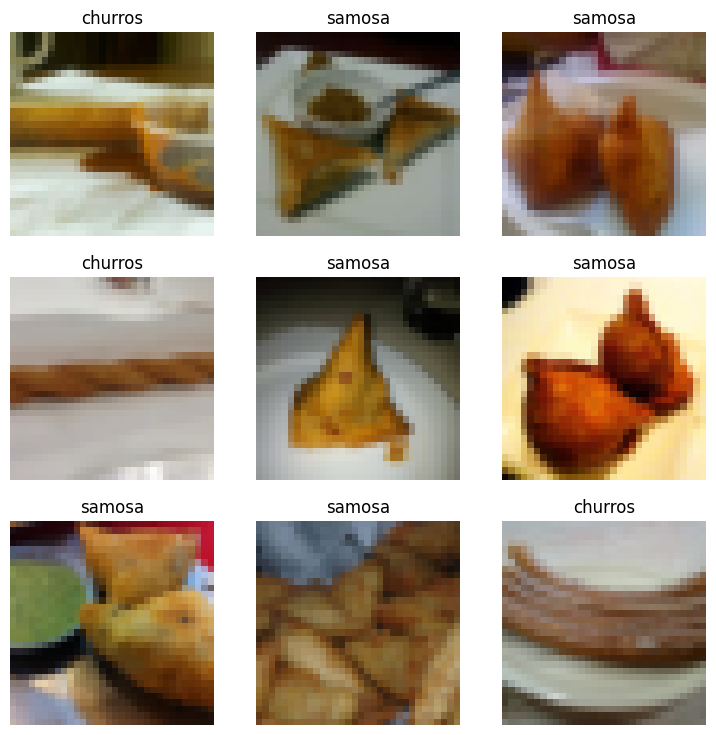

In [46]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=420,
    label_func=GetLabel, item_tfms=Resize(32))

dls.train.show_batch()


In [47]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=1)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 48.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.192224,0.790271,0.387500,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.944424,0.766140,0.315000,00:52


In [ ]:
from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]

img = PILImage.create(uploadedImg)
img.show()

label,_,probs = learn.predict(img)

print(f"This is a {label}.")
print(f"{labelA} {probs[1].item():.6f}")
print(f"{labelB} {probs[0].item():.6f}")

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


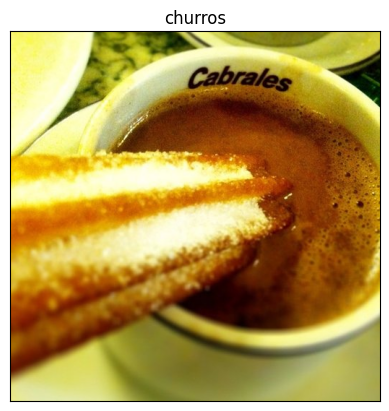

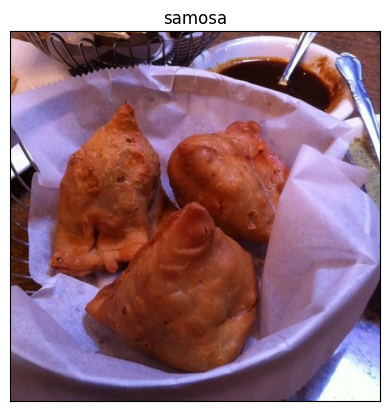

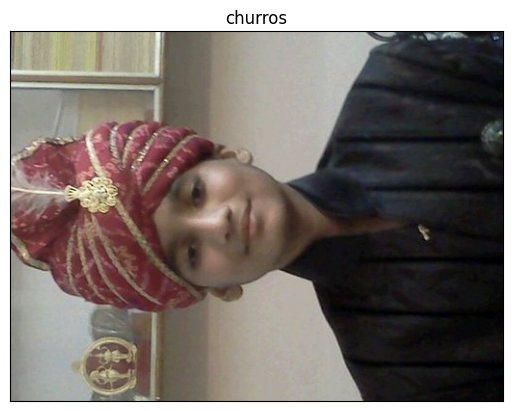

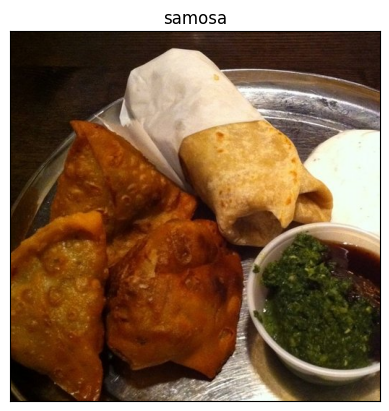

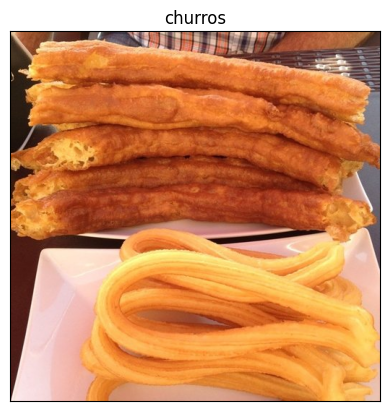

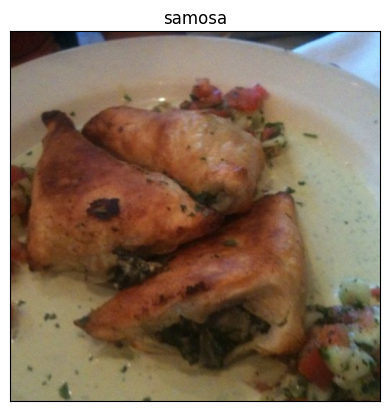

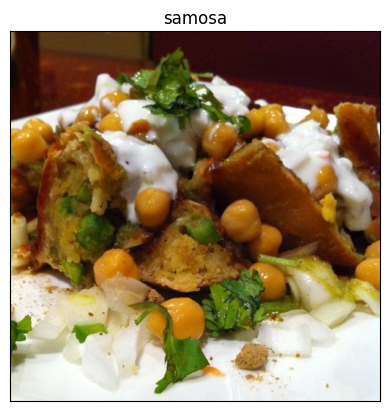

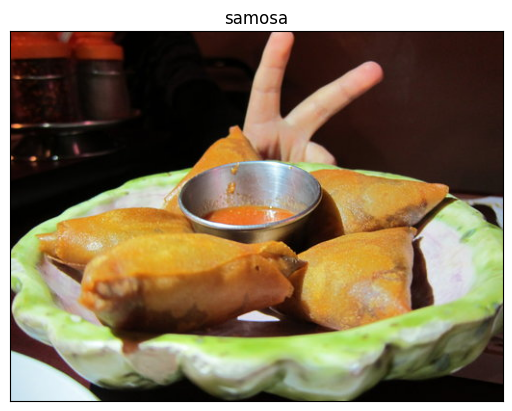

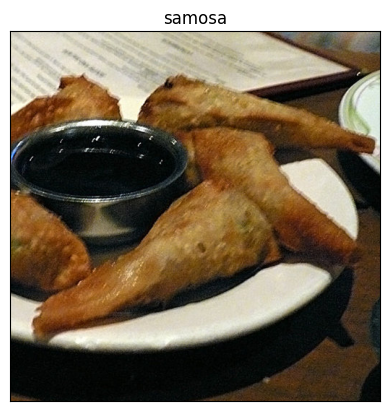

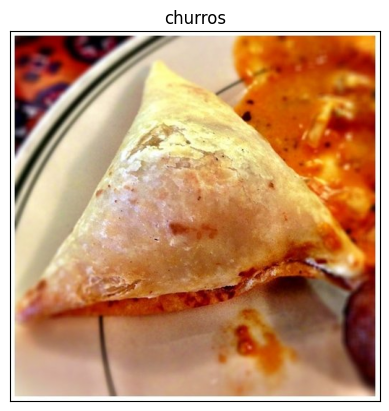

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,10):
  #Load random image
  randomIndex = random.randint(0, len(get_image_files(path))-1)
  img = mpimg.imread(get_image_files(path)[randomIndex])
  #Put into Model
  label,_,probs = learn.predict(img)

  #Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot() #Add Subplot (For multiple images)
  imgplot = plt.imshow(img) #Add Image into Plot
  ax.set_title(label) #Set Headline to predicted label

  #Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

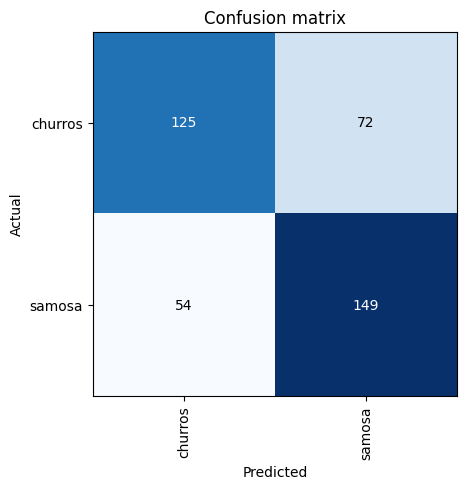

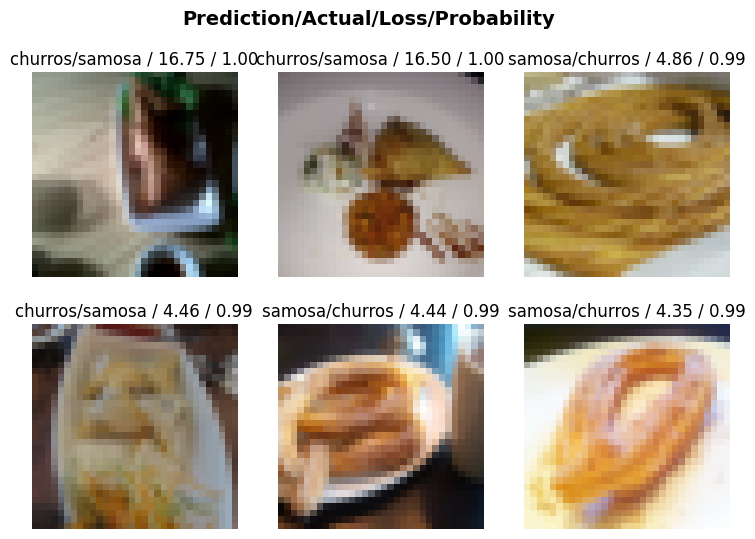

In [50]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(6)